# Physics 129 Final Project #3

# Studying the $Z$ boson using data from CMS

## Introduction

The Compact Muon Solenoid (CMS) is a general-purpose detector at the Large Hadron Collider (LHC). It has a broad physics programme ranging from studying the Standard Model (including the Higgs boson) to searching for extra dimensions and particles that could make up dark matter. Although it has the same scientific goals as the ATLAS experiment, it uses different technical solutions and a different magnet-system design.

The CMS detector is built around a huge solenoid magnet. This takes the form of a cylindrical coil of superconducting cable that generates a field of 4 tesla, about 100,000 times the magnetic field of the Earth. The field is confined by a steel “yoke” that forms the bulk of the detector’s 14,000-tonne weight.

The CMS detector is shaped like a cylindrical onion, with several concentric layers of components. The silicon tracker is the innermost layer, surrounded by the electromagnetic and hadronic caloimeters. The superconducting solenoid surrounds the calorimeters and lies within the muon system.

<div style="width: 500px;margin: auto" align="center">
    <img src="1920px-CMS_160312_06.png">
    Figure 1. The CMS Detector
</div>


## Goals

Study the properties of the $Z$ boson using dimuon and dielectron data from CMS. Key properties include the cross-section, mass and width. You will need to estimate the backgrounds to each sample from the data. 

The cross-section can be calculated using the following formula:

$$ \sigma = \frac{S - B}{A \times E \times L}$$

where
* S is the number of signal events
* B is the number of background events
* A is the acceptance
* E is the efficiency
* L is the luminosity

In the dataset that you are analysing you are given the following values
* The luminosity is 20 pb$^{-1}$.
* The acceptance is 40%
* The efficiency is 90% for the dimuons and 75% for the dielectrons

Please note that you could expect to reproduce the cross-section to within 20%.

References: 
* CMS paper: https://arxiv.org/pdf/1107.4789.pdf
* PDG : http://pdg.lbl.gov/2019/listings/rpp2019-list-z-boson.pdf

<div style="width: 500px;margin: auto" align="center">
    <img src="Zmumu.png">
    Invariant mass distributions for the $Z \rightarrow \mu\mu$ process
</div>

<div style="width: 500px;margin: auto" align="center">
    <img src="Zee.png">
    Invariant mass distributions for the $Z \rightarrow ee$ process
</div>

## The Dataset

A set of selection cuts have been applied to the data collected by the CMS experiment. 

In the muon dataset, only events with two muons were kept. The following selection requirements (or cuts) were applied to the muons


* Both muons are "global" muons
* 60 < $M_{\mu\mu} < 120$ GeV
* |$\eta$| < 2.1 for both muons
* $p_{t}$ > 20 GeV

These requirements ensure that the muons are of high quality and that there is little background. The luminosity of the dataset corresponds to $2.1$fb$^{-1}$.

In the electron dataset, only events with two electrons were kept. The following selection requirements (or cuts) were applied to the electrons

* 60 < $M_{ee}$ < 120 GeV
* $p_{t}$ > 25 GeV

The following code will read in the data and print out the available variables in the dataset. It can be applied to either the muon or the electron data files.


In [2]:
import pandas as pd #pandas is a convenient tool to analyse the data; however you don't have to use it if you don't want to
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import math

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
%matplotlib inline

# Create a new DataFrame structure from the file "DoubleMuRun2011A.csv"
dataset = pd.read_csv('Zmumu_Run2011A.csv')
#dataset = pd.read_csv('Zmumu.csv')

# This will list the available variables in the dataset
for element in dataset:
    print(element)

display(dataset)

Run
Event
pt1
eta1
phi1
Q1
dxy1
iso1
pt2
eta2
phi2
Q2
dxy2
iso2


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.432396,2.574210,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.422140
1,165617,75138253,24.5872,-2.052200,2.866570,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.000000
2,165617,75887636,31.7386,-2.259450,-1.332290,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.000000
3,165617,75779415,39.7394,-0.712338,-0.312266,1,0.058481,0.000000,48.2790,-0.195625,2.970320,-1,-0.049201,0.000000
4,165617,75098104,41.2998,-0.157055,-3.040770,1,-0.030463,1.228040,43.4508,0.590958,-0.042756,-1,0.044175,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,173692,1299415108,33.3603,0.321707,-0.952148,-1,0.087974,0.000000,60.2670,0.032189,2.216650,1,-0.087861,0.000000
10579,173692,1299728844,74.3439,0.437127,-2.850590,1,-0.025119,0.000000,71.9078,0.186247,2.143860,-1,-0.088395,0.000000
10580,173692,1298906069,35.7601,-0.413531,-3.090880,-1,-0.043689,0.000000,51.1800,0.297272,-0.124431,1,0.056803,1.458560
10581,173692,1298930383,44.1196,-1.364130,-1.172910,1,0.082500,0.000000,41.6146,-0.289064,2.809960,-1,-0.067675,0.442641


Each element in the dataset is simply a variable.

For the muons, the variables are as follows:
* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the muon
* eta is the pseudorapidity of the muon: $\eta$
* phi is the $\phi$ angle of the muon direction
* Q is the charge of the muon
* dxy is the impact parameter in the transverse plane: $d_{xy}$
* iso is the track isolation: $I_{track}$

For the electrons, the variables are as follows:
* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the electron
* eta is the pseudorapidity of the electron: $\eta$
* phi is the $\phi$ angle of the electron direction
* Q is the charge of the electron
* type is either EB or EE: whether the electron is in the barrel or in the endcap
* sigmaEtaEta is the weighted cluster rms along $\eta$: $\sigma_{\eta\eta}$
* HoverE is the HCAL energy / ECAL energy
* isoTrack is the isolation variable for tracks
* isoEcal is the isolation variable for the ECAL
* isoHcal is the isolation variable for the HCAL

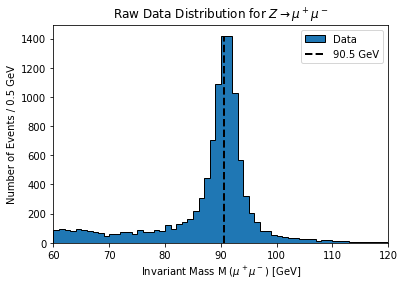

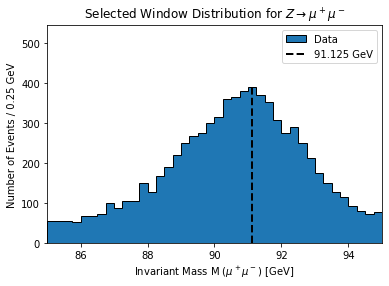

sigma = 1043.1944444444443


In [3]:
pt1 = dataset['pt1'].to_numpy()
pt2 = dataset['pt2'].to_numpy()
eta1 = dataset['eta1'].to_numpy()
eta2 = dataset['eta2'].to_numpy()
phi1 = dataset['phi1'].to_numpy()
phi2 = dataset['phi2'].to_numpy()
dxy1 = dataset['dxy1'].to_numpy()
dxy2 = dataset['dxy2'].to_numpy()
iso1 = dataset['iso1'].to_numpy()
iso2 = dataset['iso2'].to_numpy()

invMass = np.zeros(len(dataset))

invMass = np.sqrt(2*pt1*pt2*(np.cosh(eta1-eta2) - np.cos(phi1-phi2)))

(nUC, b, p) = plt.hist(invMass, bins=60, range=(60, 120), histtype='stepfilled', edgecolor='black', linewidth=1, label='Data')
massZ = (b[np.where(nUC == np.max(nUC))[0][0]] + b[1 + np.where(nUC==np.max(nUC))[0][0]])/2
plt.vlines(massZ, ymin=0.0, ymax=np.max(nUC), color='black', linestyle='dashed', linewidth=2.0, label=f'{massZ} GeV')
plt.legend()
plt.xlim(60, 120)
plt.xlabel('Invariant Mass M $(\mu^+ \mu^-)$ [GeV]')
plt.ylabel('Number of Events / 0.5 GeV')
plt.title('Raw Data Distribution for $Z \\rightarrow \\mu^+ \\mu^-$')
plt.savefig('1.png',dpi=250)
plt.show()

(nIW, b, p) = plt.hist(invMass, bins=40, range=(85, 95), histtype='stepfilled', edgecolor='black', linewidth=1, label='Data')
massZ = (b[np.where(nIW == np.max(nIW))[0][0]] + b[1 + np.where(nIW==np.max(nIW))[0][0]])/2
plt.vlines(massZ, ymin=0.0, ymax=np.max(nIW), color='black', linestyle='dashed', linewidth=2.0, label=f'{massZ} GeV')
plt.xlim([85, 95])
plt.xlabel('Invariant Mass M $(\mu^+ \mu^-)$ [GeV]')
plt.ylim([0.0, 1.4*np.max(nIW)])
plt.ylabel('Number of Events / 0.25 GeV')
plt.title('Selected Window Distribution for $Z \\rightarrow \\mu^+ \\mu^-$')
plt.legend()
plt.savefig('2.png',dpi=250)
plt.show()

sigma = np.sum(nIW)/(0.4*0.9*20)
print(f"sigma = {sigma}")

Become familiar with the contents of the dataset by plotting out different variables.







Calculate the invariant mass of the pair of muons in each event. Plot this mass and identify the $Z$-boson.


In this analysis, there is little background, however, we will check if we should tighten any of our selection cuts. Define a range in the invariant mass around the $Z$ boson where there is signal but very little background. Select the events within that window and plot the properties of the other variables, e.g. the momentum, impact parameter, isolation, etc. Next select the events below and above that window (these we will call the sidebands) and make the same set of plots. Do you observe any significant differences in the distributions between the signal and the background? Determine and apply any additional selection cuts.

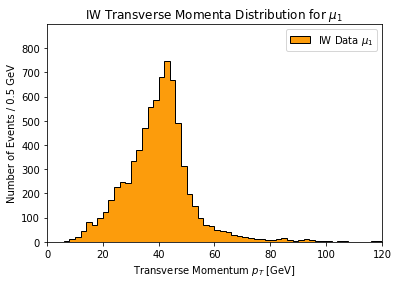

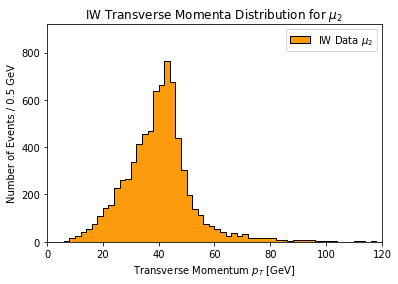

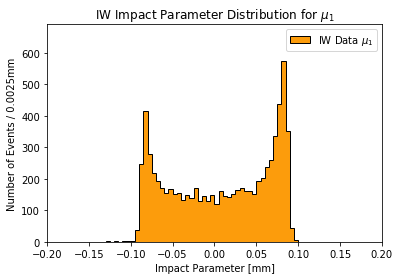

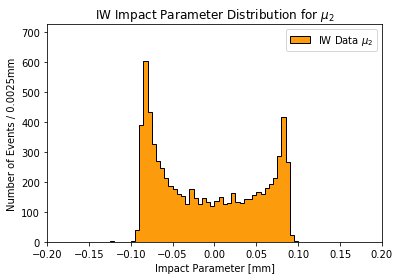

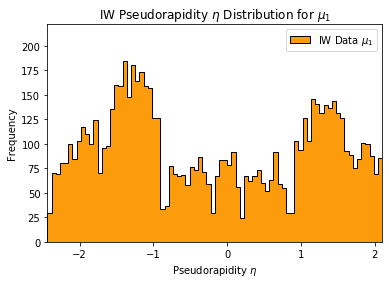

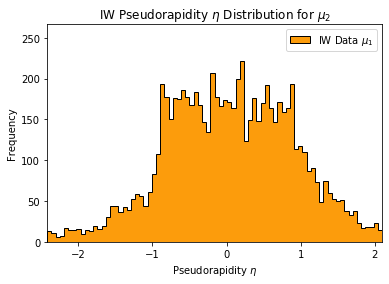

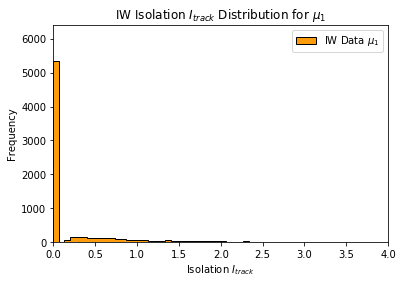

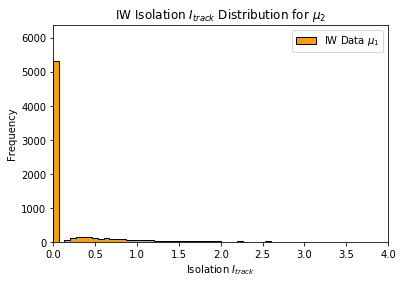

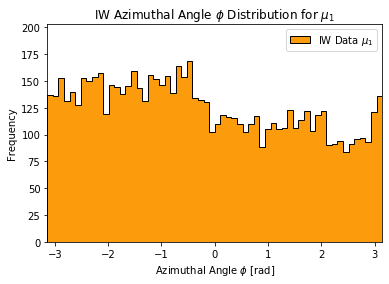

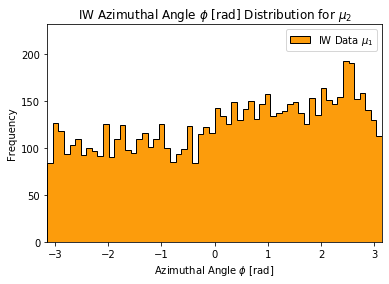

In [4]:
pt1Cut = []
pt2Cut = []
pt1SBL = []
pt2SBL = []
pt1SBH = []
pt2SBH = []

eta1Cut = []
eta2Cut = []
eta1SBL = []
eta2SBL = []
eta1SBH = []
eta2SBH = []

dxy1Cut = []
dxy2Cut = []
dxy1SBL = []
dxy2SBL = []
dxy1SBH = []
dxy2SBH = []

iso1Cut = []
iso2Cut = []
iso1SBL = []
iso2SBL = []
iso1SBH = []
iso2SBH = []

phi1Cut = []
phi2Cut = []
phi1SBL = []
phi2SBL = []
phi1SBH = []
phi2SBH = []

for i in range(len(pt1)):
    
    invM = np.sqrt(2*pt1[i]*pt2[i]*(np.cosh(eta1[i] - eta2[i]) - np.cos(phi1[i] - phi2[i])))
    if invM > np.min(b) and invM < np.max(b):
        
        pt1Cut.append(pt1[i])
        pt2Cut.append(pt2[i])
        eta1Cut.append(eta1[i])
        eta2Cut.append(eta2[i])
        dxy1Cut.append(dxy1[i])
        dxy2Cut.append(dxy2[i])
        iso1Cut.append(iso1[i])
        iso2Cut.append(iso2[i])
        phi1Cut.append(phi1[i])
        phi2Cut.append(phi2[i])
        
    if invM < np.min(b):
        
        pt1SBL.append(pt1[i])
        pt2SBL.append(pt2[i])
        eta1SBL.append(eta1[i])
        eta2SBL.append(eta2[i])
        dxy1SBL.append(dxy1[i])
        dxy2SBL.append(dxy2[i])
        iso1SBL.append(iso1[i])
        iso2SBL.append(iso2[i])
        phi1SBL.append(phi1[i])
        phi2SBL.append(phi2[i])
        
    if invM > np.max(b):
        
        pt1SBH.append(pt1[i])
        pt2SBH.append(pt2[i])
        eta1SBH.append(eta1[i])
        eta2SBH.append(eta2[i])
        dxy1SBH.append(dxy1[i])
        dxy2SBH.append(dxy2[i])
        iso1SBH.append(iso1[i])
        iso2SBH.append(iso2[i])
        phi1SBH.append(phi1[i])
        phi2SBH.append(phi2[i])

pt1Cut = np.array(pt1Cut)
pt2Cut = np.array(pt2Cut)
pt1SBL = np.array(pt1SBL)
pt2SBL = np.array(pt2SBL)
pt1SBH = np.array(pt1SBH)
pt2SBH = np.array(pt2SBH)

eta1Cut = np.array(eta1Cut)
eta2Cut = np.array(eta2Cut)
eta1SBL = np.array(eta1SBL)
eta2SBL = np.array(eta2SBL)
eta1SBH = np.array(eta2SBH)
eta2SBH = np.array(eta2SBH)

phi1Cut = np.array(phi1Cut)
phi2Cut = np.array(phi2Cut)
phi1SBL = np.array(phi1SBL)
phi2SBL = np.array(phi2SBL)
phi1SBH = np.array(phi1SBH)
phi2SBH = np.array(phi2SBH)

(n1, b1, p1) = plt.hist(pt1Cut, bins=60, range=(0, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.2*np.max(n1)) 
plt.title('IW Transverse Momenta Distribution for $\\mu_1$')
plt.legend()
plt.savefig('3.png',dpi=250)
plt.show()

(n2, b2, p2) = plt.hist(pt2Cut, bins=60, range=(0, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_2$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(np.min(b2), 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.2*np.max(n2))
plt.title('IW Transverse Momenta Distribution for $\\mu_2$')
plt.legend()
plt.savefig('4.png',dpi=250)
plt.show()

(dxyn1, dxyb1, dxyp1) = plt.hist(dxy1Cut, bins=80, range=(-0.2, 0.2), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Impact Parameter [mm]')
plt.xlim(-0.2, 0.2)
plt.ylabel('Number of Events / 0.0025mm')
plt.ylim(0, 1.2*np.max(dxyn1)) 
plt.title('IW Impact Parameter Distribution for $\\mu_1$')
plt.legend()
plt.show()

(dxyn2, dxyb2, dxyp2) = plt.hist(dxy2Cut, bins=80, range=(-0.2, 0.2), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_2$')
plt.xlabel('Impact Parameter [mm]')
plt.xlim(-0.2, 0.2)
plt.ylabel('Number of Events / 0.0025mm')
plt.ylim(0, 1.2*np.max(dxyn2))
plt.title('IW Impact Parameter Distribution for $\\mu_2$')
plt.legend()
plt.show()

(etan1, etab1, etap1) = plt.hist(eta1Cut, bins=80, color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Pseudorapidity $\eta$')
plt.xlim(np.min(etab1), np.max(etab1))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(etan1)) 
plt.title('IW Pseudorapidity $\\eta$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(etan2, etab2, etap2) = plt.hist(eta2Cut, bins=80, color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Pseudorapidity $\eta$')
plt.xlim(np.min(etab2), np.max(etab2))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(etan2)) 
plt.title('IW Pseudorapidity $\\eta$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

(ison1, isob1, isop1) = plt.hist(iso1Cut, bins=60, range=(0, 4), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Isolation $I_{track}$')
plt.xlim(np.min(isob1), np.max(isob1))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(ison1)) 
plt.title('IW Isolation $I_{track}$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(ison2, isob2, isop2) = plt.hist(iso2Cut, bins=60, range=(0, 4), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Isolation $I_{track}$')
plt.xlim(np.min(isob2), np.max(isob2))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(ison2)) 
plt.title('IW Isolation $I_{track}$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

(phin1, phib1, phip1) = plt.hist(phi1Cut, bins=60, range=(-np.pi, np.pi), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Azimuthal Angle $\phi$ [rad]')
plt.xlim(np.min(phib1), np.max(phib1))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(phin1)) 
plt.title('IW Azimuthal Angle $\phi$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(phin2, phib2, phip2) = plt.hist(phi2Cut, bins=60, range=(-np.pi, np.pi), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
plt.xlabel('Azimuthal Angle $\phi$ [rad]')
plt.xlim(np.min(phib2), np.max(phib2))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(phin2)) 
plt.title('IW Azimuthal Angle $\phi$ [rad] Distribution for $\\mu_2$')
plt.legend()
plt.show()

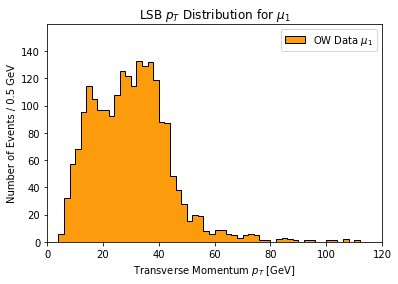

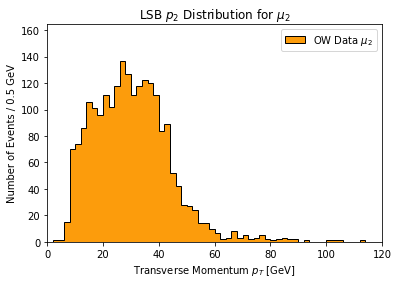

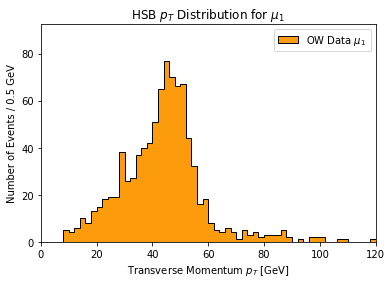

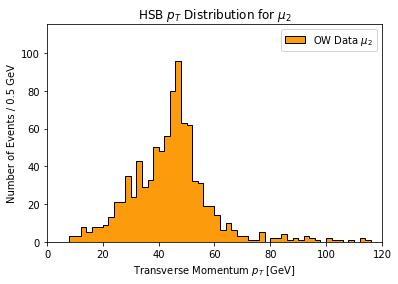

In [5]:
(n1l, b1l, p1l) = plt.hist(pt1SBL, bins=60, range=(0, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.2*np.max(n1l)) 
plt.title('LSB $p_T$ Distribution for $\\mu_1$')
plt.legend()
plt.savefig('5.png',dpi=250)
plt.show()

(n1l2, b1l2, p1l2) = plt.hist(pt2SBL, bins=60, range=(0, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.2*np.max(n1l2)) 
plt.title('LSB $p_2$ Distribution for $\\mu_2$')
plt.legend()
plt.savefig('6.png',dpi=250)
plt.show()

(n1h, b1h, p1h) = plt.hist(pt1SBH, bins=60, range=(0, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.2*np.max(n1h)) 
plt.title('HSB $p_T$ Distribution for $\\mu_1$')
plt.legend()
plt.savefig('7.png',dpi=250)
plt.show()

(n1h2, b1h2, p1h2) = plt.hist(pt2SBH, bins=60, range=(0, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.2*np.max(n1h2)) 
plt.title('HSB $p_T$ Distribution for $\\mu_2$')
plt.legend()
plt.savefig('8.png',dpi=250)
plt.show()

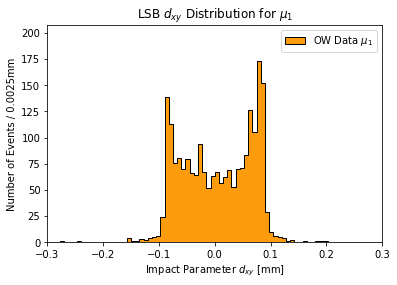

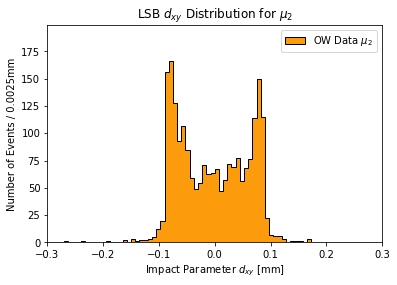

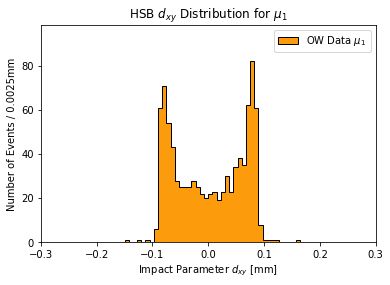

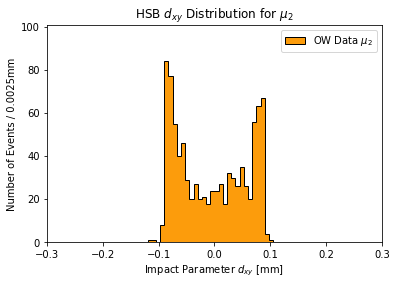

In [6]:
(dxyn1SBL, dxyb1SBL, dxyp1SBL) = plt.hist(dxy1SBL, bins=80, range=(-0.3, 0.3), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Impact Parameter $d_{xy}$ [mm]')
plt.xlim(-0.3, 0.3)
plt.ylabel('Number of Events / 0.0025mm')
plt.ylim(0, 1.2*np.max(dxyn1SBL)) 
plt.title('LSB $d_{xy}$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(dxyn2SBL, dxyb2SBL, dxyp2SBL) = plt.hist(dxy2SBL, bins=80, range=(-0.3, 0.3), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Impact Parameter $d_{xy}$ [mm]')
plt.xlim(-0.3, 0.3)
plt.ylabel('Number of Events / 0.0025mm')
plt.ylim(0, 1.2*np.max(dxyn2SBL))
plt.title('LSB $d_{xy}$ Distribution for $\\mu_2$')
plt.legend()
plt.show()


(dxyn1SBH, dxyb1SBH, dxyp1SBH) = plt.hist(dxy1SBH, bins=80, range=(-0.3, 0.3), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Impact Parameter $d_{xy}$ [mm]')
plt.xlim(-0.3, 0.3)
plt.ylabel('Number of Events / 0.0025mm')
plt.ylim(0, 1.2*np.max(dxyn1SBH)) 
plt.title('HSB $d_{xy}$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(dxyn2SBH, dxyb2SBH, dxyp2SBH) = plt.hist(dxy2SBH, bins=80, range=(-0.3, 0.3), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Impact Parameter $d_{xy}$ [mm]')
plt.xlim(-0.3, 0.3)
plt.ylabel('Number of Events / 0.0025mm')
plt.ylim(0, 1.2*np.max(dxyn2SBH))
plt.title('HSB $d_{xy}$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

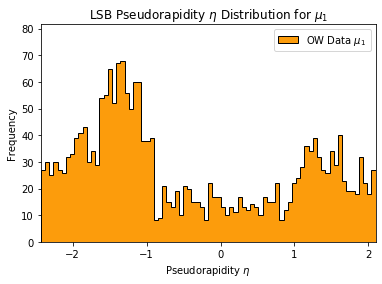

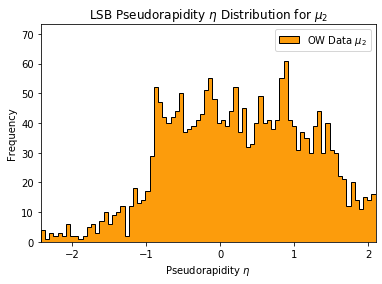

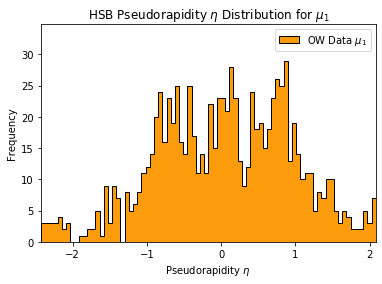

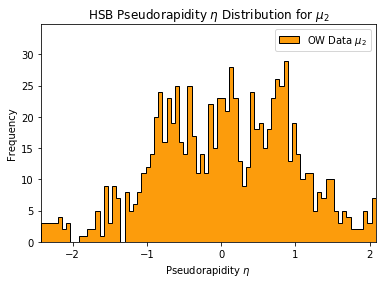

In [7]:
(etan1SBL, etab1SBL, etap1SBL) = plt.hist(eta1SBL, bins=80, color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Pseudorapidity $\eta$')
plt.xlim(np.min(etab1SBL), np.max(etab1SBL))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(etan1SBL)) 
plt.title('LSB Pseudorapidity $\\eta$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(etan2SBL, etab2SBL, etap2SBL) = plt.hist(eta2SBL, bins=80, color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Pseudorapidity $\eta$')
plt.xlim(np.min(etab2SBL), np.max(etab2SBL))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(etan2SBL)) 
plt.title('LSB Pseudorapidity $\\eta$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

(etan1SBH, etab1SBH, etap1SBH) = plt.hist(eta1SBH, bins=80, color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Pseudorapidity $\eta$')
plt.xlim(np.min(etab1SBH), np.max(etab1SBH))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(etan1SBH)) 
plt.title('HSB Pseudorapidity $\\eta$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(etan2SBH, etab2SBH, etap2SBH) = plt.hist(eta2SBH, bins=80, color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Pseudorapidity $\eta$')
plt.xlim(np.min(etab2SBH), np.max(etab2SBH))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(etan2SBH)) 
plt.title('HSB Pseudorapidity $\\eta$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

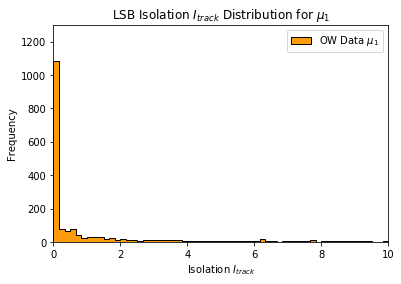

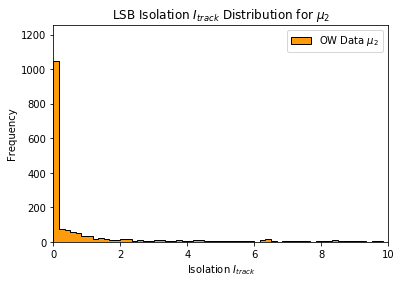

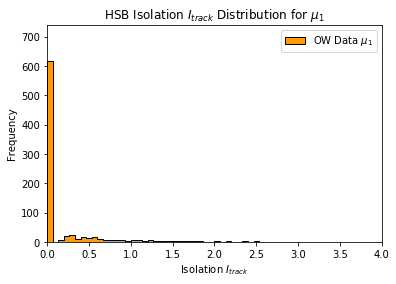

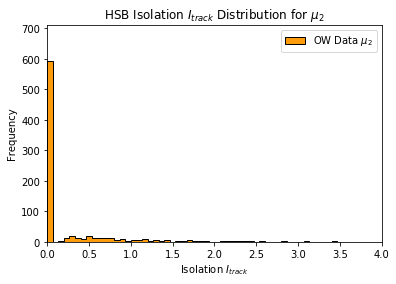

In [8]:
(ison1SBL, isob1SBL, isop1SBL) = plt.hist(iso1SBL, bins=60, range=(0, 10), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Isolation $I_{track}$')
plt.xlim(np.min(isob1SBL), np.max(isob1SBL))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(ison1SBL)) 
plt.title('LSB Isolation $I_{track}$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(ison2SBL, isob2SBL, isop2SBL) = plt.hist(iso2SBL, bins=60, range=(0, 10), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Isolation $I_{track}$')
plt.xlim(np.min(isob2SBL), np.max(isob2SBL))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(ison2SBL)) 
plt.title('LSB Isolation $I_{track}$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

(ison1SBH, isob1SBH, isop1SBH) = plt.hist(iso1SBH, bins=60, range=(0, 4), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_1$')
plt.xlabel('Isolation $I_{track}$')
plt.xlim(np.min(isob1SBH), np.max(isob1SBH))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(ison1SBH)) 
plt.title('HSB Isolation $I_{track}$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(ison2SBH, isob2SBH, isop2SBH) = plt.hist(iso2SBH, bins=60, range=(0, 4), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='OW Data $\mu_2$')
plt.xlabel('Isolation $I_{track}$')
plt.xlim(np.min(isob2SBH), np.max(isob2SBH))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(ison2SBH)) 
plt.title('HSB Isolation $I_{track}$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

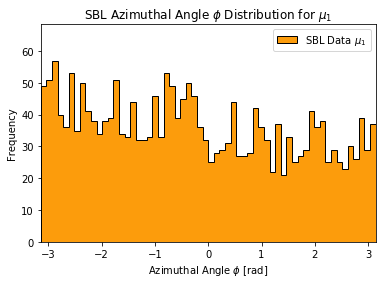

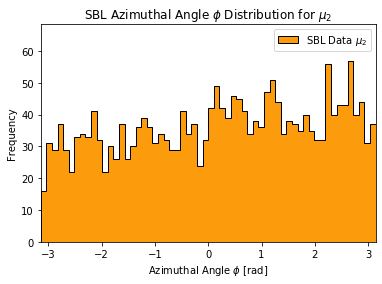

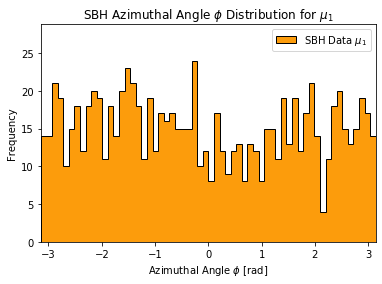

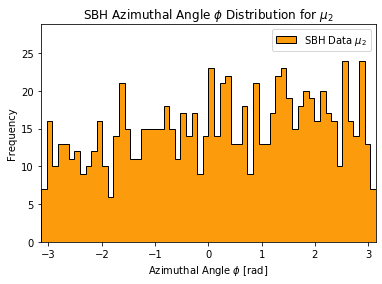

In [9]:
(phin1SBL, phib1SBL, phip1SBL) = plt.hist(phi1SBL, bins=60, range=(-np.pi, np.pi), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_1$')
plt.xlabel('Azimuthal Angle $\phi$ [rad]')
plt.xlim(np.min(phib1SBL), np.max(phib1SBL))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(phin1SBL)) 
plt.title('SBL Azimuthal Angle $\phi$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(phin2SBL, phib2SBL, phip2SBL) = plt.hist(phi2SBL, bins=60, range=(-np.pi, np.pi), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_2$')
plt.xlabel('Azimuthal Angle $\phi$ [rad]')
plt.xlim(np.min(phib2SBL), np.max(phib2SBL))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(phin2SBL)) 
plt.title('SBL Azimuthal Angle $\phi$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

(phin1SBH, phib1SBH, phip1SBH) = plt.hist(phi1SBH, bins=60, range=(-np.pi, np.pi), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_1$')
plt.xlabel('Azimuthal Angle $\phi$ [rad]')
plt.xlim(np.min(phib1SBH), np.max(phib1SBH))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(phin1SBH)) 
plt.title('SBH Azimuthal Angle $\phi$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

(phin2SBH, phib2SBH, phip2SBH) = plt.hist(phi2SBH, bins=60, range=(-np.pi, np.pi), color='#fc9c0c', alpha=1.0, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_2$')
plt.xlabel('Azimuthal Angle $\phi$ [rad]')
plt.xlim(np.min(phib2SBH), np.max(phib2SBH))
plt.ylabel('Frequency')
plt.ylim(0, 1.2*np.max(phin2SBH)) 
plt.title('SBH Azimuthal Angle $\phi$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

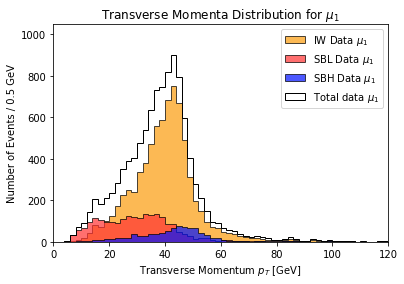

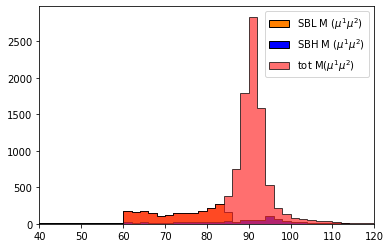

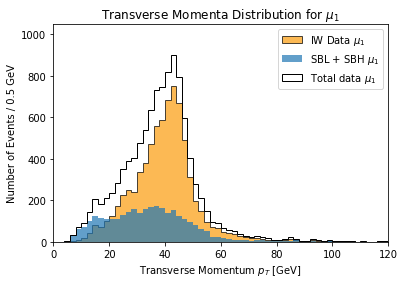

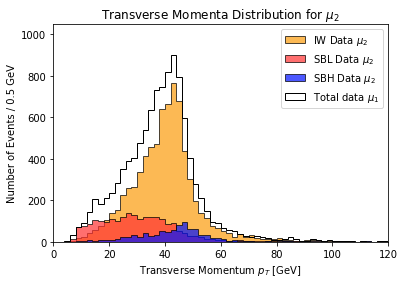

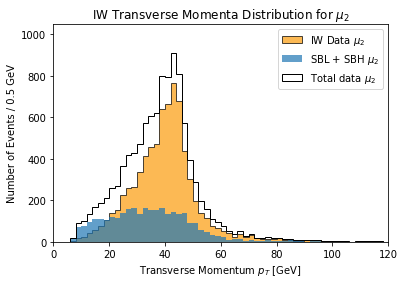

In [10]:
(n1, b1, p1) = plt.hist(pt1Cut, bins=60, range=(0, 120), color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
(n1l, b1l, p1l) = plt.hist(pt1SBL, bins=60, range=(0, 120), color='#ff3232', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_1$')
(n1h, b1h, p1h) = plt.hist(pt1SBH, bins=60, range=(0, 120), color='#0011ff', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_1$')
plt.hist(pt1, bins=60, range=(0, 120), color='#00b200', alpha=1.0, histtype='step', edgecolor='black', linewidth=1.0, label='Total data $\mu_1$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Transverse Momenta Distribution for $\\mu_1$')
plt.legend()
plt.savefig('d1.png',dpi=250)
plt.show()

invMassSBL = np.sqrt(2*pt1SBL*pt2SBL*(np.cosh(eta1SBL-eta2SBL) - np.cos(phi1SBL-phi2SBL)))
invMassSBH = np.sqrt(2*pt1SBH*pt2SBH*(np.cosh(eta1SBH-eta2SBH) - np.cos(phi1SBH-phi2SBH)))
plt.hist(invMassSBL, bins=60, range=(0, 120), color='#ff8000', histtype='stepfilled', edgecolor='black', label='SBL M $(\mu^1 \mu^2)$')
plt.hist(invMassSBH, bins=60, range=(0, 120), color='#0000ff', histtype='stepfilled', edgecolor='black', label='SBH M $(\mu^1 \mu^2)$')
(n, b, p) = plt.hist(invMass, bins=60, range=(0, 120), color='#ff3232', histtype='stepfilled', alpha=0.7, edgecolor='black', label='tot M$(\mu^1 \mu^2)$')
plt.xlim(40, 120)
plt.legend()
plt.savefig('d2.png',dpi=250)
plt.show()


plt.hist(pt1Cut, bins=60, range=(0, 120), color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', label='IW Data $\mu_1$')
plt.hist(np.concatenate((pt1SBL, pt1SBH)), bins=60, range=(0, 120), alpha=0.7, label='SBL + SBH $\mu_1$')
plt.hist(pt1, bins=60, range=(0, 120), histtype='step', edgecolor='black', label='Total data $\mu_1$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Transverse Momenta Distribution for $\\mu_1$')
plt.legend()
plt.savefig('d3.png',dpi=250)
plt.show()

(n2, b2, p2) = plt.hist(pt2Cut, bins=60, range=(0, 120), color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_2$')
(n2l, b2l, p2l) = plt.hist(pt2SBL, bins=60, range=(0, 120), color='#ff3232', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_2$')
(n2h, b2h, p2h) = plt.hist(pt2SBH, bins=60, range=(0, 120), color='#0011ff', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_2$')
plt.hist(pt1, bins=60, range=(0, 120), color='#00b200', alpha=1.0, histtype='step', edgecolor='black', linewidth=1.0, label='Total data $\mu_1$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Transverse Momenta Distribution for $\\mu_2$')
plt.legend()
plt.savefig('d4.png',dpi=250)
plt.show()

plt.hist(pt2Cut, bins=60, range=(0, 120), color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', label='IW Data $\mu_2$')
plt.hist(np.concatenate((pt2SBL, pt2SBH)), bins=60, range=(0, 120), alpha=0.7, label='SBL + SBH $\mu_2$')
plt.hist(pt2, bins=60, range=(0, 120), histtype='step', edgecolor='black', label='Total data $\mu_2$')
plt.xlabel('Transverse Momentum $p_T$ [GeV]')
plt.xlim(0, 120)
plt.ylabel('Number of Events / 0.5 GeV')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('IW Transverse Momenta Distribution for $\\mu_2$')
plt.legend()
plt.show()

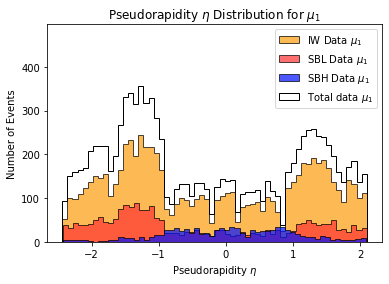

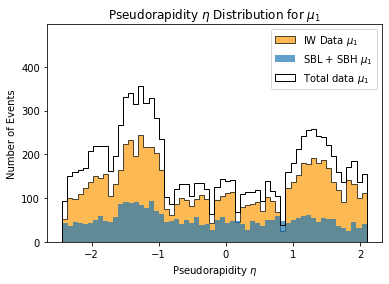

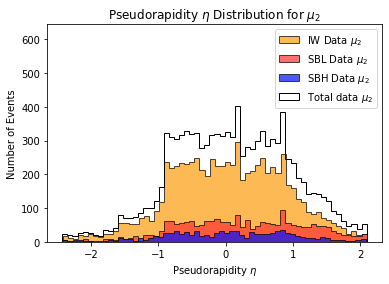

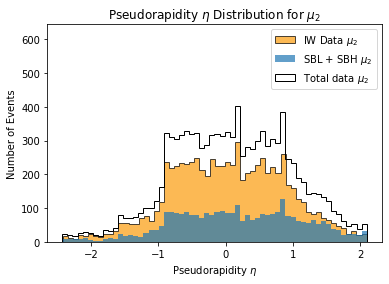

In [11]:
plt.hist(eta1Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
(n1l, b1l, p1l) = plt.hist(eta1SBL, bins=60, color='#ff3232', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_1$')
(n1h, b1h, p1h) = plt.hist(eta1SBH, bins=60, color='#0011ff', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_1$')
(n1, b1, p1) = plt.hist(eta1, bins=60, color='#00b200', alpha=1.0, histtype='step', edgecolor='black', linewidth=1.0, label='Total data $\mu_1$')
plt.xlabel('Pseudorapidity $\eta$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Pseudorapidity $\eta$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

plt.hist(eta1Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', label='IW Data $\mu_1$')
plt.hist(np.concatenate((eta1SBL, eta1SBH)), bins=60, alpha=0.7, label='SBL + SBH $\mu_1$')
plt.hist(eta1, bins=60, histtype='step', edgecolor='black', label='Total data $\mu_1$')
plt.xlabel('Pseudorapidity $\eta$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Pseudorapidity $\eta$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

plt.hist(eta2Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_2$')
(n2l, b2l, p2l) = plt.hist(eta2SBL, bins=60, color='#ff3232', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_2$')
(n2h, b2h, p2h) = plt.hist(eta2SBH, bins=60, color='#0011ff', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_2$')
(n2, b2, p2) = plt.hist(eta2, bins=60, color='#00b200', alpha=1.0, histtype='step', edgecolor='black', linewidth=1.0, label='Total data $\mu_2$')
plt.xlabel('Pseudorapidity $\eta$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.6*np.max(n2)) 
plt.title('Pseudorapidity $\eta$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

plt.hist(eta2Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', label='IW Data $\mu_2$')
plt.hist(np.concatenate((eta2SBL, eta2SBH)), bins=60, alpha=0.7, label='SBL + SBH $\mu_2$')
plt.hist(eta2, bins=60, histtype='step', edgecolor='black', label='Total data $\mu_2$')
plt.xlabel('Pseudorapidity $\eta$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.6*np.max(n2)) 
plt.title('Pseudorapidity $\eta$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

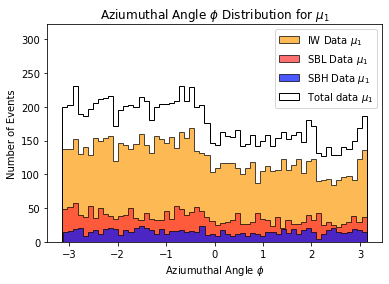

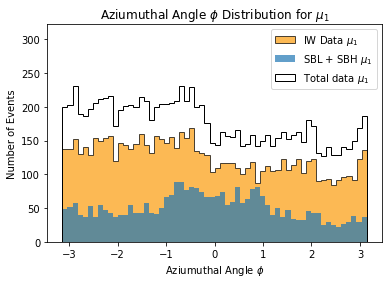

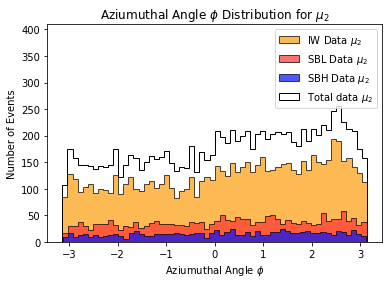

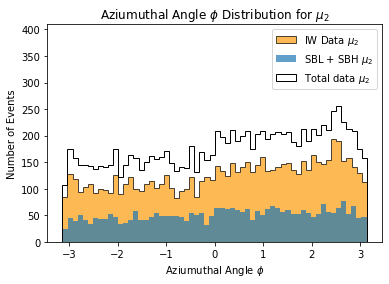

In [12]:
plt.hist(phi1Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_1$')
(n1l, b1l, p1l) = plt.hist(phi1SBL, bins=60, color='#ff3232', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_1$')
(n1h, b1h, p1h) = plt.hist(phi1SBH, bins=60, color='#0011ff', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_1$')
(n1, b1, p1) = plt.hist(phi1, bins=60, color='#00b200', alpha=1.0, histtype='step', edgecolor='black', linewidth=1.0, label='Total data $\mu_1$')
plt.xlabel('Aziumuthal Angle $\phi$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Aziumuthal Angle $\phi$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

plt.hist(phi1Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', label='IW Data $\mu_1$')
plt.hist(np.concatenate((phi1SBL, eta1SBH)), bins=60, alpha=0.7, label='SBL + SBH $\mu_1$')
plt.hist(phi1, bins=60, histtype='step', edgecolor='black', label='Total data $\mu_1$')
plt.xlabel('Aziumuthal Angle $\phi$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.4*np.max(n1)) 
plt.title('Aziumuthal Angle $\phi$ Distribution for $\\mu_1$')
plt.legend()
plt.show()

plt.hist(phi2Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='IW Data $\mu_2$')
(n2l, b2l, p2l) = plt.hist(phi2SBL, bins=60, color='#ff3232', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBL Data $\mu_2$')
(n2h, b2h, p2h) = plt.hist(phi2SBH, bins=60, color='#0011ff', alpha=0.7, histtype='stepfilled', edgecolor='black', linewidth=1, label='SBH Data $\mu_2$')
(n2, b2, p2) = plt.hist(phi2, bins=60, color='#00b200', alpha=1.0, histtype='step', edgecolor='black', linewidth=1.0, label='Total data $\mu_2$')
plt.xlabel('Aziumuthal Angle $\phi$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.6*np.max(n2)) 
plt.title('Aziumuthal Angle $\phi$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

plt.hist(phi2Cut, bins=60, color='#fc9c0c', alpha=0.7, histtype='stepfilled', edgecolor='black', label='IW Data $\mu_2$')
plt.hist(np.concatenate((phi2SBL, phi2SBH)), bins=60, alpha=0.7, label='SBL + SBH $\mu_2$')
plt.hist(phi2, bins=60, histtype='step', edgecolor='black', label='Total data $\mu_2$')
plt.xlabel('Aziumuthal Angle $\phi$')
plt.ylabel('Number of Events')
plt.ylim(0, 1.6*np.max(n2)) 
plt.title('Aziumuthal Angle $\phi$ Distribution for $\\mu_2$')
plt.legend()
plt.show()

In [13]:
from scipy.optimize import curve_fit, least_squares
from scipy.signal import savgol_filter

invMassBg = []

for val in invMass:
    
    if val > 60 and val < 75:
        
        invMassBg.append(val)
        
invMassBg = np.array(invMassBg)
xArB = np.linspace(60, 75, 15)
xAr = np.linspace(86.1876, 96.1876, 30)


def relBW(x, a, m, w):
    
    g = np.sqrt(m**2*(m**2 + w**2))
    k = (2*np.sqrt(2)*m*w*g)/(np.pi*np.sqrt(m**2 + g))
    return a*(k/((x**2-m**2)**2+m**2*w**2))

def lorentz(x, a, m, w, bg):
    
    return a*(1/(np.pi))*(w/((x-m)**2+w**2)) + bg

def crystalBall(x, a, n, m, s, c):
    
    np.seterr(all='raise')
    A = (n/abs(a))**n * np.exp(-abs(a)**2/2)
    B = n/abs(a) - abs(a)
    c
    return np.piecewise(x, [(x-m)/s > -a, (x-m)/s <= -a],
                        [lambda x: c*np.exp(-((x-m)**2)/(2*s**2)), lambda x: c*A*((B - (x-m)/s)**(-n))])

def BWconvCB(x, b1, b2, b3, c1, c2, c3, c4, c5):
    
    return np.piecewise(x, [x <= 91.6876, x > 91.6876],
                        [lambda x: crystalBall(x, c1, c2, c3, c4, c5), lambda x: relBW(x, b1, b2, b3)])

[1.24422635e+00 1.00000000e+00 9.09333524e+01 2.06700096e+00
 1.42967059e+03]


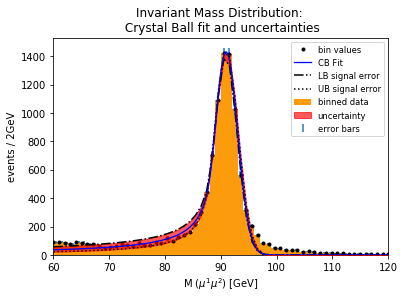

[1.03793033e+04 9.08998452e+01 4.36980645e+00]


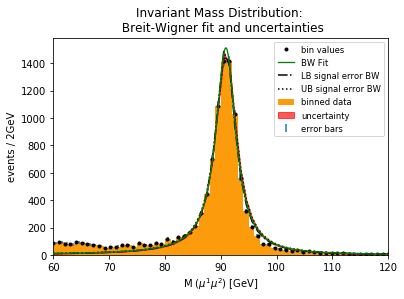

[8.08132160e+03 9.13783317e+01 3.39144349e+00 1.58791384e+00
 5.71251580e-01 9.12305967e+01 2.38512670e+00 1.44562652e+03]


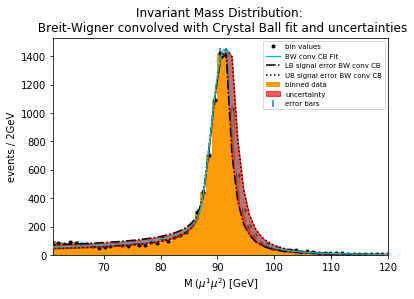

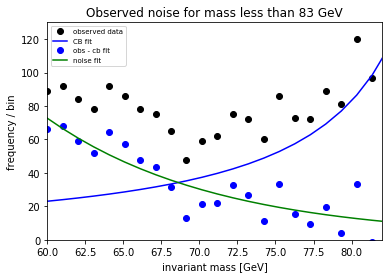

In [14]:
xVals = np.linspace(60, 120, 60)
xFitVals = np.linspace(60, 120, 600)

(n, b, p) = plt.hist(invMass, bins=60, range=(60, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', label='binned data')
plt.plot(xVals, n, 'k.', label='bin values')
poptfit, pcovfit = curve_fit(crystalBall, xVals, n, p0 = [3, 5, 91.1876, 2.5, 600], bounds = ([1, 1, 1, 1, 1], [10, np.inf, np.inf, np.inf, np.inf]))
print(poptfit)
perr = np.sqrt(np.diag(pcovfit))
bincenters = 0.5*(b[1:]+b[:-1])
errs = np.sqrt(n)
plt.errorbar(bincenters, n, yerr=errs, fmt='none', label='error bars')
plt.plot(xFitVals, crystalBall(xFitVals, *poptfit), 'b-', zorder=7, linewidth=1.3, label='CB Fit')
plt.xlim(60, 120)
signalLB = crystalBall(xVals, *(poptfit-perr))
signalUB = crystalBall(xVals, *(poptfit+perr))
plt.plot(xVals, signalLB, 'k-.', zorder=6, label='LB signal error')
plt.plot(xVals, signalUB, 'k:', zorder=6, label='UB signal error')
plt.fill_between(xVals, signalUB, signalLB, color='red', alpha=0.65, zorder=5, label='uncertainty')
plt.legend(fontsize='small')
plt.xlabel('M $(\mu^1 \mu^2)$ [GeV]')
plt.ylabel('events / 2GeV')
plt.title('Invariant Mass Distribution: \n Crystal Ball fit and uncertainties')
plt.savefig('cb.png',dpi=250)
plt.show()

_, b, _ = plt.hist(invMass, bins=60, range=(60, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', label='binned data')
plt.plot(xVals, n, 'k.', label='bin values')
poptfitbw, pcovfitbw = curve_fit(relBW, xVals, n, p0 = [3000, 91.1876, 2.4])
print(poptfitbw)
perrbw = np.sqrt(np.diag(pcovfitbw))
bincenters = 0.5*(b[1:]+b[:-1])
errs = np.sqrt(n)
plt.errorbar(bincenters, n, yerr=errs, fmt='none', label='error bars')
plt.plot(xFitVals, relBW(xFitVals, *poptfitbw), 'g-', zorder=7, linewidth=1.3, label='BW Fit')
plt.xlim(60, 120)
signalLBbw = relBW(xVals, *(poptfitbw-perrbw))
signalUBbw = relBW(xVals, *(poptfitbw+perrbw))
plt.plot(xVals, signalLBbw, 'k-.', zorder=6, label='LB signal error BW')
plt.plot(xVals, signalUBbw, 'k:', zorder=6, label='UB signal error BW')
plt.fill_between(xVals, signalUBbw, signalLBbw, color='red', alpha=0.65, zorder=5, label='uncertainty')
plt.legend(fontsize='small')
plt.xlabel('M $(\mu^1 \mu^2)$ [GeV]')
plt.ylabel('events / 2GeV')
plt.title('Invariant Mass Distribution: \n Breit-Wigner fit and uncertainties')
plt.savefig('bw.png',dpi=250)
plt.show()

_, b, _ = plt.hist(invMass, bins=60, range=(60, 120), color='#fc9c0c', alpha=1.0, histtype='stepfilled', label='binned data')
plt.plot(xVals, n, 'k.', label='bin values')
poptfitconv, pcovfitconv = curve_fit(BWconvCB, xVals, n, p0 = [3000, 91.1876, 2.3, 3, 5, 91.1876, 1.2, 600],
                                    bounds = ([0, 0, 0, .1, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf,
                                                                           np.inf, np.inf, np.inf, np.inf]))
print(poptfitconv)
perrconv = np.sqrt(np.diag(pcovfitconv))
bincenters = 0.5*(b[1:]+b[:-1])
errs = np.sqrt(n)
plt.errorbar(bincenters, n, yerr=errs, fmt='none', label='error bars')
plt.plot(xFitVals, BWconvCB(xFitVals, *poptfitconv), 'c-', zorder=7, linewidth=1.3, label='BW conv CB Fit')
plt.xlim(61.1876, 120)
signalLBconv = BWconvCB(xVals, *(poptfitconv-perrconv))
signalUBconv = BWconvCB(xVals, *(poptfitconv+perrconv))
plt.plot(xVals, signalLBconv, 'k-.', zorder=6, label='LB signal error BW conv CB')
plt.plot(xVals, signalUBconv, 'k:', zorder=6, label='UB signal error BW conv CB')
plt.fill_between(xVals, signalUBconv, signalLBconv, color='red', alpha=0.65, zorder=5, label='uncertainty')
plt.legend(fontsize='x-small')
plt.xlabel('M $(\mu^1 \mu^2)$ [GeV]')
plt.ylabel('events / 2GeV')
plt.title('Invariant Mass Distribution: \n Breit-Wigner convolved with Crystal Ball fit and uncertainties')
plt.savefig('conv.png',dpi=250)
plt.show()

residual = []
chiSq = 0

def residuals(obs, exp):
    
    return obs - exp

def chiSq(obs, exp):
    
    chiSq = 0
    
    for x, v in zip(obs, exp):
        
        chiSq = chiSq + (x - v)**2/(v)
        
    return chiSq
        
def redXsq(obs, exp, numParams):
    
    return chiSq(obs, exp)/(len(obs)-numParams)
    
# plt.plot(xVals, background, 'k', linestyle='dotted', linewidth=3.0)

# jumpVal = xVals[np.where(background == np.max(background))[0][0]]

def error(x, a, b, c, d):
    
    return np.piecewise(x, [x < jumpVal, x >= jumpVal], [lambda x: a*x + b, lambda x: c*np.exp(-(x-jumpVal)/d)])

# popterr, pcoverr = curve_fit(error, xVals, background, p0 = [-.5, 10, 74.4, 4], bounds = ([-3, 0, 50, 3], [.01, 300, 400, 7]))
# perrerr = np.sqrt(np.diag(pcoverr))
# #plt.plot(xVals, error(xVals, *popterr), 'b-.', label='residuals from CB fit')
# errorLB = error(xVals, *(popterr-perrerr))
# errorUB = error(xVals, *(popterr+perrerr))
# #plt.plot(xVals, error(xVals, *(popterr-perrerr)), 'k-.', label='BG fit LB')
# #plt.plot(xVals, error(xVals, *(popterr+perrerr)), 'k:', label='BG fit UB')
# #plt.fill_between(xVals, errorLB, errorUB, color='red', alpha=0.65, zorder=5, label='uncertainty')
# plt.xlabel('M $(\mu^1 \mu^2)$ [GeV]')
# plt.ylabel('frequency / bin')
# plt.title('Residuals from CB fit')
# plt.hlines(0, 61.1876, 121.1876)
# #plt.legend(fontsize='small')
# plt.xlim(61.1876, 121.1876)
# plt.show()



def expModelLHS(m, a, d, s):
    
    return a*np.exp(-(m-61.1876)/d) + s

def expModelRHS(m, a, d, s):
    
    return a*np.exp(-(m-95.1876)/d) + s

def expModelMid(m, a, d):
    
    return a*np.exp(-(m-91.1876)/d)

def polyModel(x, a, b, c):
    
    return a*x**2 + b*x + c

def linModel(x, a, b):
    
    return a*x + b

def constModel(x, a):
    
    return a*(x/x)

xLHS = xVals[0:23]
obsLHS = n[0:23]

plt.plot(xLHS, obsLHS, 'ko', label='observed data')
plt.plot(xLHS, crystalBall(xLHS, *(poptfit + perr)), 'b', label='CB fit')
plt.plot(xLHS, (obsLHS - crystalBall(xLHS, *(poptfit+perr))), 'bo', label='obs - cb fit')
plt.ylim(0, np.max(obsLHS))


pbge, pcbge = curve_fit(expModelLHS, xLHS, (obsLHS - crystalBall(xLHS, *(poptfit+perr))))
plt.plot(xLHS, expModelLHS(xLHS, *(pbge)), 'g', label='noise fit')
plt.legend(fontsize='small')
plt.xlabel('invariant mass [GeV]')
plt.ylabel('frequency / bin')
plt.title('Observed noise for mass less than 83 GeV')
plt.legend(fontsize='x-small')
plt.xlim(60, 82)
plt.savefig('noisefit.png',dpi=250)
plt.show()

def crossSection(arr):
    
        return (np.sum(n) - arr)/(.4*.9*20)
        
# print(crossSection(background))
# print(crossSection(backgroundLB))
# print(crossSection(backgroundUB))



Fit the data to determine the properties of the $Z$ boson and estimate the background. Choose appropriate functions for the signal and the background. Fit the data and estimate
* Number of signal events
* Number of background events
* Mass
* Width

[3.27047825e-01 5.00000000e+00 9.15572890e+01 1.80000000e+00
 8.00000000e+02]


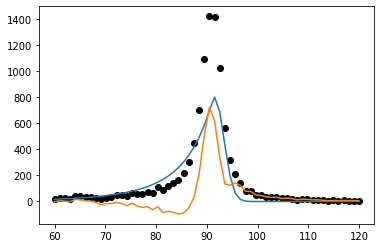

[1.02947580e+04 9.09033041e+01 4.31720021e+00]


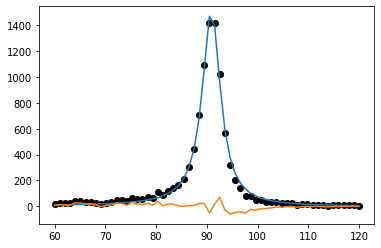

[8.08133418e+03 9.13783288e+01 3.39144294e+00 1.21488350e+00
 1.41824513e+00 9.10710785e+01 2.14340176e+00 1.45502081e+03]
[7.14849335e+02 1.62884002e-01 7.55671718e-02 2.82894616e-02
 7.20280475e-02 3.54832623e-02 3.86245041e-02 6.50395803e+00]
9766.491737207958
816.5082627920397
8949.983474415918


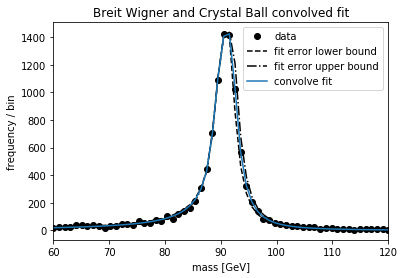



9441.095151166764
10157.503990447967
1141.9048488332346
425.49600955202976




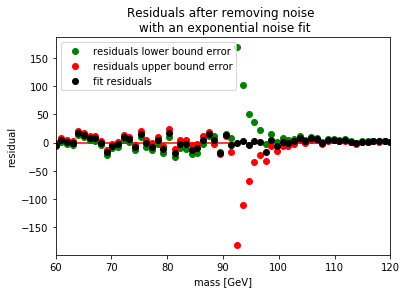

86.73108312399258
1.6679054446921648
9836.410286061842


In [23]:
signal = np.concatenate((np.abs(obsLHS - expModelLHS(xLHS, *pbge)), n[23:]))
plt.plot(xVals, signal, 'ko')
poptS, pcovS = curve_fit(crystalBall, xVals, signal, p0=[2, 1, 91.1876, 1.8, 775], bounds = ([0.1, .5, 91, 1.7, 750], [2, 5, 92, 1.8, 800]))
print(poptS)
fit = crystalBall(xVals, *poptS)
plt.plot(xVals, fit)

res = residuals(signal, fit)
plt.plot(xVals, res)
plt.show()

plt.plot(xVals, signal, 'ko')
poptSbw, pcovSbw = curve_fit(relBW, xVals, signal, p0=[3000, 90, 2.6])
print(poptSbw)
fitbw = relBW(xVals, *poptSbw)
plt.plot(xVals, fitbw)

res = residuals(signal, fitbw)
plt.plot(xVals, res)
plt.show()

plt.plot(xVals, signal, 'ko', label='data')
poptSconv, pcovSconv = curve_fit(BWconvCB, xVals, signal, p0=[3000, 91.1876, 2.6, 2, 1, 91.1876, 1.8, 775])
convErr = np.sqrt(np.diag(pcovSconv))
print(poptSconv)
print(convErr)
fitconv = BWconvCB(xVals, *poptSconv)
print(np.sum(fitconv))
print(np.sum(n - fitconv))
print(np.sum(fitconv) - np.sum(n - fitconv))
plt.plot(xVals, BWconvCB(xVals, *(poptSconv - convErr)), 'k--', label='fit error lower bound')
plt.plot(xVals, BWconvCB(xVals, *(poptSconv + convErr)), 'k-.', label='fit error upper bound')
plt.plot(xVals, fitconv, label='convolve fit')
plt.title('Breit Wigner and Crystal Ball convolved fit')
plt.xlabel('mass [GeV]')
plt.ylabel('frequency / bin')
plt.xlim(60, 120)
plt.legend()
plt.savefig('newconv.png',dpi=250)
plt.show()

print('\n')
print(np.sum(BWconvCB(xVals, *(poptSconv - convErr))))
print(np.sum(BWconvCB(xVals, *(poptSconv + convErr))))

print(np.sum(n - BWconvCB(xVals, *(poptSconv - convErr))))
print(np.sum(n - BWconvCB(xVals, *(poptSconv + convErr))))
print('\n')

res = residuals(signal, fitconv)
plt.plot(xVals, residuals(signal, BWconvCB(xVals, *(poptSconv - convErr))), 'go', label='residuals lower bound error')
plt.plot(xVals, residuals(signal, BWconvCB(xVals, *(poptSconv + convErr))), 'ro', label='residuals upper bound error')
plt.plot(xVals, res, 'ko', label='fit residuals')
plt.xlabel('mass [GeV]')
plt.ylabel('residual')
plt.title('Residuals after removing noise \n with an exponential noise fit')
plt.hlines(0, 60, 120, 'r')
plt.xlim(60, 120)
plt.savefig('resid.png',dpi=250)
plt.legend()
plt.show()
xSq = chiSq(signal, fitconv)

xSq = 0
for s, f in zip(signal, fitconv):
    
    xSq = xSq + (s - f)**2/(f)
    
print(xSq)
print(xSq/52)

print(np.sum(signal))

# Extensions



Here are some ideas about how you could explore the data further, but you're welcome to take your project in a different direction

* Make some event displays for several of your candidate events.
* Calculate the statistical uncertainty on your cross-section
* Identify the main systematic uncertainties on your cross-section measurement
* Develop a tag-and-probe method to measure the efficiency of your selection cuts
* Divide the electron data into 4 categories depending on whether each of the electrons is located in the barrel and the end-cap. How does the resolution and background rate compare between the categories?